<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<p style="font-size:22px; font-weight:bold; text-align:center;">Business Challenge II</p>
<p style="font-size:18px; text-align:center;">Kaggle Competition - House Price</p>
<p style="font-size:18px; text-align:center;">Team 7</p>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


<img src="https://i.imgur.com/rCVzwXj.png" alt="Kaggle" style="width: 80%; border-radius: 10px; display: block; margin-left: auto; margin-right: auto;"/>

## Introduction

Whith this project, we are able to predict house prices using Machine Learning models by analyzing key property attributes such as lot size, house age, garage capacity, and neighborhood quality. 

Through exploratory data analysis (EDA), we identify missing values, outliers, and key feature correlations to improve data quality. Feature engineering enhances the dataset by creating new variables, such as total square footage and neighborhood rankings, while categorical data is properly encoded. 
Various regression models, including Linear Regression, Bayesian Ridge,  and Lasso, are trained and evaluated using cross-validation to optimize performance. 

By leveraging data analysis and machine learning, this project seeks to build an accurate house price prediction model and uncover the most influential factors driving property values.

We started with a set up of the analysis environment by importing essential Python libraries for data manipulation (pandas, numpy), visualization (matplotlib, seaborn), and machine learning (statsmodels, sklearn).

## Packages and Datasets Imports

In [1]:
# Import Libraries 

import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import RobustScaler, PowerTransformer, StandardScaler, MinMaxScaler,QuantileTransformer
from sklearn.linear_model import BayesianRidge, Lasso, LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt      
import seaborn as sns      

# Load the data
train_df = pd.read_csv('train.csv').copy()
test_df = pd.read_csv('test.csv').copy()

## Exploratory Data Analysis and Data Preprocessing 

In this step, we're exploring the data to understand its structure before training our model. Since we're making predictions, we only analyze the training data to avoid data leakage and ensure fair evaluation. 

This step helps us check data types, missing values, and overall quality, so we can clean and prepare it properly before building the model.

### Exploratory Data Analysis

In [2]:
# Exploratory Data Analysis
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We generate summary statistics to understand the numerical and categorical variables in the dataset. This helps identify patterns, trends, and any potential data issues before further analysis.

In [3]:
train_df.describe(include = 'number')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
train_df.describe(include = 'object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [5]:
# analyzing (Pearson) correlations
df_corr = train_df.select_dtypes(include='number').corr(method = 'pearson').round(decimals = 2)
df_corr.loc[ : , ['SalePrice'] ].sort_values(by = 'SalePrice', ascending = False)

,SalePrice
SalePrice,1.00
OverallQual,0.79
GrLivArea,0.71
GarageCars,0.64
GarageArea,0.62
TotalBsmtSF,0.61
1stFlrSF,0.61
FullBath,0.56
TotRmsAbvGrd,0.53
YearBuilt,0.52


### Data Visualizations

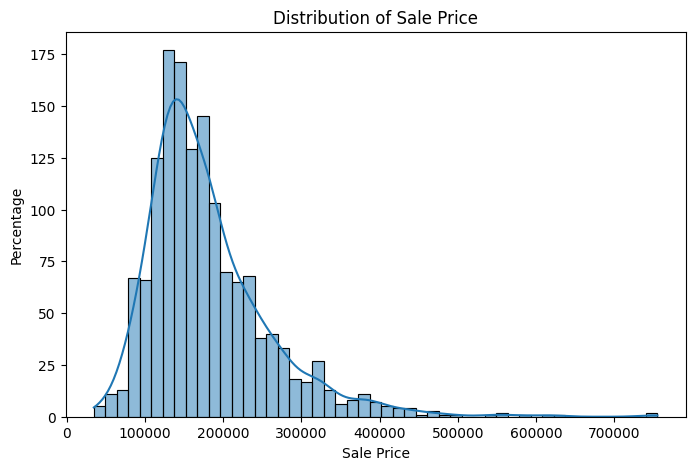

In [6]:
# Histogram for Sales Price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, 
             x='SalePrice', 
             kde=True)

# title and axis labels
plt.title("Distribution of Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Percentage")

# displaying the histogram
plt.show()

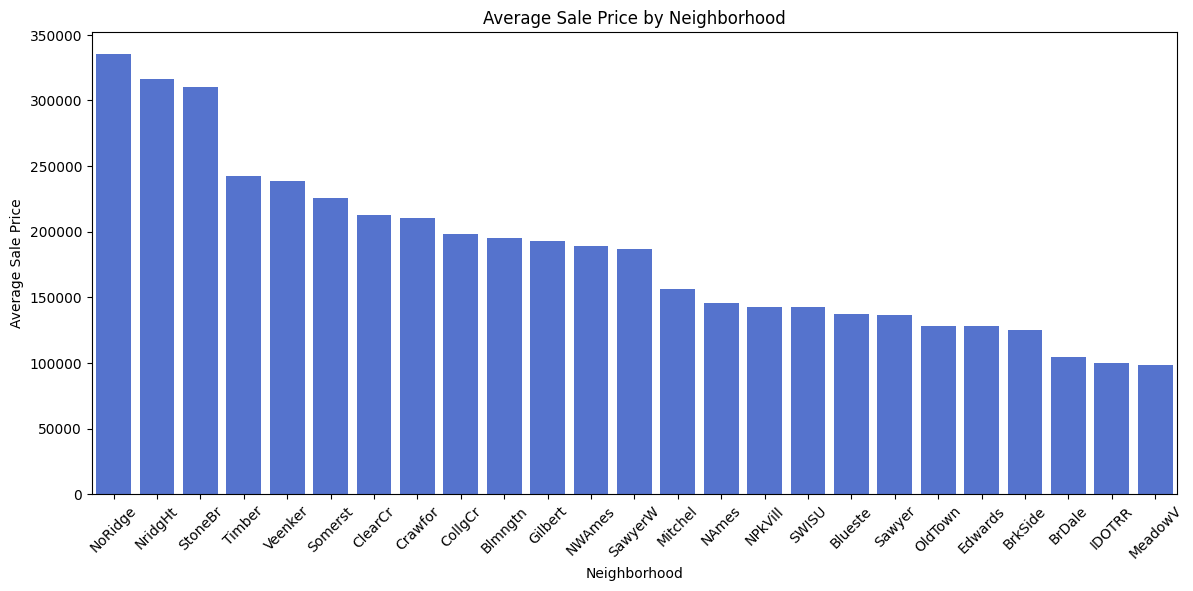

In [7]:
plt.figure(figsize=(14, 6))

# Bar plot of average SalePrice by Neighborhood
sns.barplot(
    data=train_df, 
    x="Neighborhood", 
    y="SalePrice", 
    color="royalblue",  # Set all bars to blue
    order=train_df.groupby("Neighborhood")["SalePrice"].mean().sort_values(ascending=False).index,
    ci=None  # Removes the black error bars
)

plt.xticks(rotation=45)  # Rotate x-axis labels
plt.title("Average Sale Price by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Average Sale Price")
plt.show()

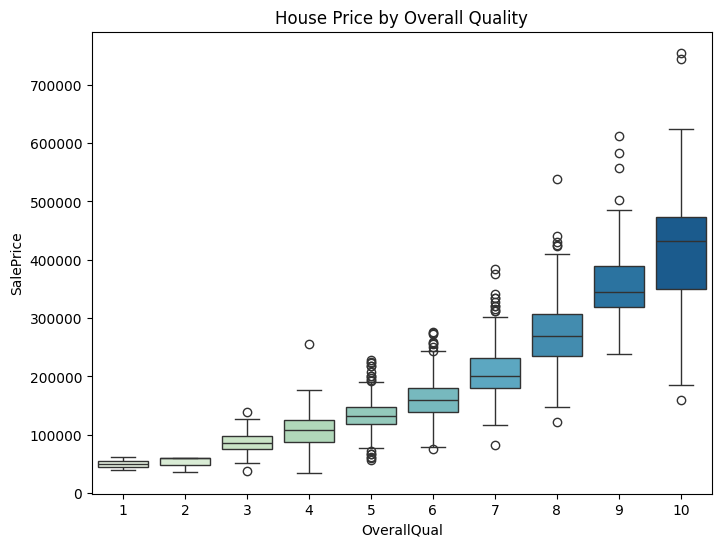

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df, palette='GnBu')
title = plt.title('House Price by Overall Quality')

### Outliers Analysis

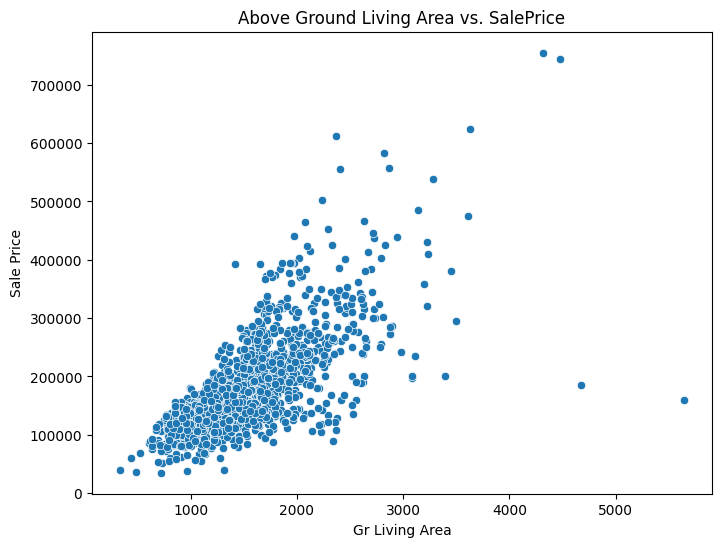

In [9]:
# Single plot
plt.figure(figsize=(8,6))

# Scatterplot with REVENUE_log
sns.scatterplot(x=train_df["GrLivArea"], y=train_df["SalePrice"])

# Title and labels
plt.title('Above Ground Living Area vs. SalePrice')
plt.xlabel('Gr Living Area')
plt.ylabel('Sale Price')

# Show plot
plt.show()

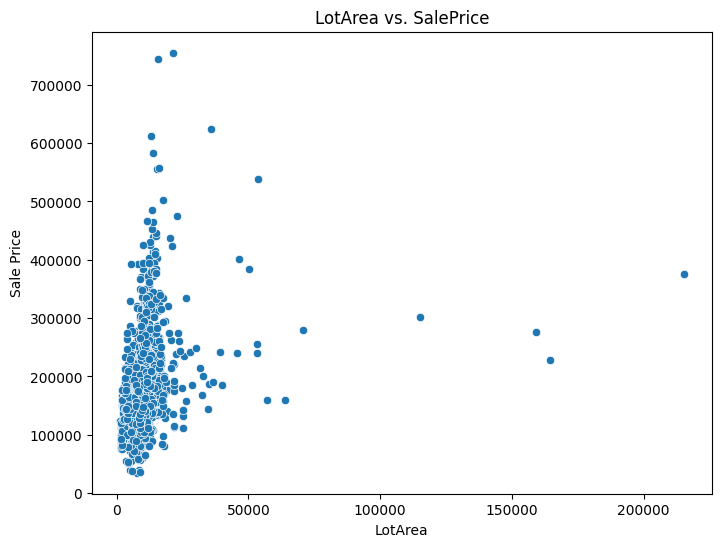

In [10]:
# Single plot
plt.figure(figsize=(8,6))

# Scatterplot with REVENUE_log
sns.scatterplot(x=train_df['LotArea'], y=train_df["SalePrice"])

# Title and labels
plt.title('LotArea vs. SalePrice')
plt.xlabel('LotArea')
plt.ylabel('Sale Price')

# Show plot
plt.show()

### Missing Values Analysis

In [11]:
# Check missing values in all_data

train_df = pd.read_csv("train.csv")
missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


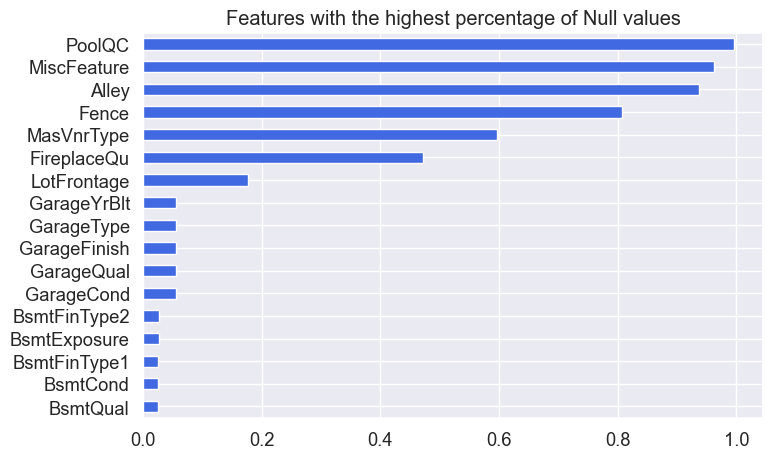

In [12]:
# Missing Values Distribution graph

col_nan = train_df.isna().sum() / train_df.shape[0]

# Sort in descending order
col_nan = col_nan[col_nan > 0.01].sort_values(ascending=True)

# Count missing values per column
plt.figure(figsize=(8, 5))
sns.set(font_scale=1.2)
col_nan.plot(kind="barh", color='royalblue')
plt.title("Features with the highest percentage of Null values")
plt.show()


### Descriptive Statistics 

Let's quickly run a Regression Model to check for the correlation between Sale Price and features that have a correlation greater than 0.4. 

In [13]:
import statsmodels.formula.api as smf # regression modeling

## optimal model using REVENUE ##
lm_Sales= smf.ols(formula = """SalePrice ~ OverallQual +
                                            GrLivArea +
                                            GarageCars +
                                            GarageArea +
                                            TotalBsmtSF +   
                                            FullBath +
                                            TotRmsAbvGrd +
                                            YearBuilt +
                                            YearRemodAdd +
                                            GarageYrBlt +
                                            MasVnrArea +
                                            Fireplaces""",
                        data = train_df)

# telling Python to FIT the data to the blueprint
results_Sales = lm_Sales.fit()


# printing a summary of the results
print(results_Sales.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     391.8
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        22:27:02   Log-Likelihood:                -16378.
No. Observations:                1371   AIC:                         3.278e+04
Df Residuals:                    1358   BIC:                         3.285e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.104e+06   1.43e+05     -7.726   

### Analysis

On our Exploratory Data Analysis (EDA) we find some key insights into house prices and their influencing factors. The correlation matrix highlights strong relationships between features like OverallQual, GrLivArea, and GarageCars with SalePrice, confirming their importance in predicting home values. The histogram of sale prices indicates a right-skewed distribution, suggesting that applying a log transformation could help normalize the data for better modeling.

The bar chart comparing average sale prices across neighborhoods shows significant variation, with certain neighborhoods commanding much higher prices. This suggests that location is a crucial factor in home valuation. Additionally, the boxplot of OverallQual vs. SalePrice confirms that higher-quality homes tend to sell for more.

The scatterplots for GrLivArea and LotArea against SalePrice reveal potential outliers, particularly for homes with exceptionally large living spaces or lot sizes. These anomalies may require removal or adjustment to improve model performance. Lastly, our missing values analysis highlights features with a high percentage of null values, such as PoolQC and MiscFeature, which may need to be dropped or imputed strategically.

Overall, these visualizations help us identify patterns, detect outliers, and refine our dataset for predictive modeling, ensuring we use the most relevant features for accurate price estimation.

After doing this analysis and have a better understanding of our data, we can proceed to clean it, prepare it and run the models.

## Data Preprocessing, Feature Engineering and Candidate Model Development

In [14]:

# ------------------------------------------------------------------------------
# 1. Drop 'Id'
# ------------------------------------------------------------------------------
test_ids = test_df["Id"].copy()
if "Id" in train_df.columns:
    train_df.drop("Id", axis=1, inplace=True)
if "Id" in test_df.columns:
    test_df.drop("Id", axis=1, inplace=True)

# ------------------------------------------------------------------------------
# 2. Basic cleaning + outlier removal
# ------------------------------------------------------------------------------
drop_cols = ["PoolQC", "MiscFeature", "Alley", "Fence"]
train_df.drop(columns=drop_cols, errors="ignore", inplace=True)
test_df.drop(columns=drop_cols, errors="ignore", inplace=True)

train_df = train_df.loc[train_df["GrLivArea"] <= 4500].copy()

# Handle missing LotFrontage by neighborhood average
train_df["LotFrontage"] = train_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.mean()))
test_df["LotFrontage"]  = test_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.mean()))

zero_fill = ["BsmtFinSF1", "BsmtFinSF2", "BsmtFullBath", "BsmtHalfBath", "MasVnrArea"]
for col in zero_fill:
    train_df[col] = train_df[col].fillna(0)
    test_df[col]  = test_df[col].fillna(0)

# ------------------------------------------------------------------------------
# 3. Feature Engineering
# ------------------------------------------------------------------------------
# 3a. Bathroom features
train_df["Total_Bath"] = (
    train_df["FullBath"]
    + 0.5 * train_df["HalfBath"]
    + train_df["BsmtFullBath"]
    + 0.5 * train_df["BsmtHalfBath"]
)
test_df["Total_Bath"] = (
    test_df["FullBath"]
    + 0.5 * test_df["HalfBath"]
    + test_df["BsmtFullBath"]
    + 0.5 * test_df["BsmtHalfBath"]
)
train_df.drop(["FullBath", "HalfBath", "BsmtFullBath", "BsmtHalfBath"], axis=1, errors="ignore", inplace=True)
test_df.drop(["FullBath", "HalfBath", "BsmtFullBath", "BsmtHalfBath"], axis=1, errors="ignore", inplace=True)

# 3b. TotalSqFt
train_df["TotalSqFt"] = train_df["GrLivArea"] + train_df["TotalBsmtSF"] + train_df["GarageArea"]
test_df["TotalSqFt"]  = test_df["GrLivArea"] + test_df["TotalBsmtSF"] + test_df["GarageArea"]

# 3c. Garage features
train_df["HasGarage"]   = (train_df["GarageArea"] > 0).astype(int)
test_df["HasGarage"]    = (test_df["GarageArea"] > 0).astype(int)
train_df["GarageScore"] = train_df["GarageCars"] * train_df["GarageArea"]
test_df["GarageScore"]  = test_df["GarageCars"] * test_df["GarageArea"]

# 3d. HouseAge + RemodelAge
train_df["HouseAge"]   = train_df["YrSold"] - train_df["YearBuilt"]
test_df["HouseAge"]    = test_df["YrSold"] - test_df["YearBuilt"]
current_year = 2025
train_df["HouseAge2"]  = current_year - train_df["YearBuilt"]   # alternate approach
test_df["HouseAge2"]   = current_year - test_df["YearBuilt"]
train_df["RemodelAge"] = current_year - train_df["YearRemodAdd"]
test_df["RemodelAge"]  = current_year - test_df["YearRemodAdd"]

# 3e. QualitySize
train_df["QualitySize"] = train_df["OverallQual"] * train_df["GrLivArea"]
test_df["QualitySize"]  = test_df["OverallQual"] * test_df["GrLivArea"]

# 3f. NeighborhoodValue + NeighborhoodQuality
nbhd_map = train_df.groupby("Neighborhood")["SalePrice"].median()
train_df["NeighborhoodValue"] = train_df["Neighborhood"].map(nbhd_map)
test_df["NeighborhoodValue"]  = test_df["Neighborhood"].map(nbhd_map)
train_df["NeighborhoodQuality"] = train_df["NeighborhoodValue"] * train_df["OverallQual"]
test_df["NeighborhoodQuality"]  = test_df["NeighborhoodValue"]  * test_df["OverallQual"]

# ------------------------------------------------------------------------------
# 4. More Quality Encodings: ExterQual, KitchenQual, etc.
#    Then create a combined feature for overall home quality
# ------------------------------------------------------------------------------
quality_map = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}
for col in ["ExterQual", "KitchenQual", "HeatingQC"]:
    if col in train_df.columns:
        train_df[col + "_ordinal"] = train_df[col].map(quality_map)
        test_df[col + "_ordinal"]  = test_df[col].map(quality_map)

# Combine them into one metric if present
encode_cols = ["ExterQual_ordinal", "KitchenQual_ordinal", "HeatingQC_ordinal"]
encode_cols = [c for c in encode_cols if c in train_df.columns]
if encode_cols:
    # Sum or average them
    train_df["CombinedQuality"] = train_df[encode_cols].sum(axis=1)
    test_df["CombinedQuality"]  = test_df[encode_cols].sum(axis=1)
    # Multiply by OverallQual for a "holistic" measure
    if "OverallQual" in train_df.columns:
        train_df["HolisticQuality"] = train_df["CombinedQuality"] * train_df["OverallQual"]
        test_df["HolisticQuality"]  = test_df["CombinedQuality"]  * test_df["OverallQual"]

# ------------------------------------------------------------------------------
# 5. More Interaction Features
#    (a) Age * OverallQual
#    (b) HasGarage * GarageCars
#    (c) (BsmtFinSF1 + 0.5 * BsmtFinSF2) * OverallQual
#    (d) RemodelAge / HouseAge
# ------------------------------------------------------------------------------
if "HouseAge" in train_df.columns and "OverallQual" in train_df.columns:
    train_df["AgeQual"] = train_df["HouseAge"] * train_df["OverallQual"]
    test_df["AgeQual"]  = test_df["HouseAge"]  * test_df["OverallQual"]

if "HasGarage" in train_df.columns and "GarageCars" in train_df.columns:
    train_df["GarageInteraction"] = train_df["HasGarage"] * train_df["GarageCars"]
    test_df["GarageInteraction"]  = test_df["HasGarage"]  * test_df["GarageCars"]

if all(col in train_df.columns for col in ["BsmtFinSF1", "BsmtFinSF2", "OverallQual"]):
    train_df["BsmtQualInteract"] = (train_df["BsmtFinSF1"] + 0.5*train_df["BsmtFinSF2"]) * train_df["OverallQual"]
    test_df["BsmtQualInteract"]  = (test_df["BsmtFinSF1"] + 0.5*test_df["BsmtFinSF2"]) * test_df["OverallQual"]

if "RemodelAge" in train_df.columns and "HouseAge" in train_df.columns:
    train_df["RemodelFraction"] = train_df.apply(
        lambda row: row["RemodelAge"] / row["HouseAge"] if row["HouseAge"] != 0 else 0, axis=1
    )
    test_df["RemodelFraction"]  = test_df.apply(
        lambda row: row["RemodelAge"] / row["HouseAge"] if row["HouseAge"] != 0 else 0, axis=1
    )

# ------------------------------------------------------------------------------
# 6. Polynomial or Non-Linear Transformations
#    e.g., OverallQual^2, HouseAge^2, etc.
# ------------------------------------------------------------------------------
if "OverallQual" in train_df.columns and pd.api.types.is_numeric_dtype(train_df["OverallQual"]):
    train_df["OverallQual_sq"] = train_df["OverallQual"] ** 2
    test_df["OverallQual_sq"]  = test_df["OverallQual"]  ** 2

if "HouseAge2" in train_df.columns:
    train_df["HouseAge2_sq"] = train_df["HouseAge2"] ** 2
    test_df["HouseAge2_sq"]  = test_df["HouseAge2"]  ** 2

# ------------------------------------------------------------------------------
# 7. Fill/Adjust numeric columns, convert some numeric to str
# ------------------------------------------------------------------------------
num_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
if "SalePrice" in num_cols:
    num_cols.remove("SalePrice")

train_df[num_cols] = train_df[num_cols].fillna(train_df[num_cols].median())
test_df[num_cols]  = test_df[num_cols].fillna(test_df[num_cols].median())

for col in ["MSSubClass", "OverallCond"]:
    if col in train_df.columns:
        train_df[col] = train_df[col].astype(str)
    if col in test_df.columns:
        test_df[col] = test_df[col].astype(str)

# ------------------------------------------------------------------------------
# 8. Log-transform target
# ------------------------------------------------------------------------------
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

# ------------------------------------------------------------------------------
# 9. Fix skewed numeric features (clip + log1p)
# ------------------------------------------------------------------------------
numeric_feats = train_df.select_dtypes(include=[np.number]).columns.tolist()
if "SalePrice" in numeric_feats:
    numeric_feats.remove("SalePrice")

skew_vals = train_df[numeric_feats].apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_cols = skew_vals[skew_vals > 0.5].index.tolist()

for col in skewed_cols:
    # 1) Clip any negative values to 0 to avoid log(<=0)
    train_df[col] = train_df[col].clip(lower=0)
    test_df[col]  = test_df[col].clip(lower=0)

    # 2) Then apply log1p
    train_df[col] = np.log1p(train_df[col])
    test_df[col]  = np.log1p(test_df[col])

# ------------------------------------------------------------------------------
# 10. One-Hot Encoding + Alignment
# ------------------------------------------------------------------------------
train_df = pd.get_dummies(train_df)
test_df  = pd.get_dummies(test_df)
train_df, test_df = train_df.align(test_df, join="left", axis=1, fill_value=0)

# ------------------------------------------------------------------------------
# 11. Remove low-correlation features
# ------------------------------------------------------------------------------
corr_threshold = 0.05
all_feats = list(train_df.columns)
ignore_cols = ["SalePrice"]
feat_for_corr = [f for f in all_feats if f not in ignore_cols]

corr_with_price = train_df[feat_for_corr].corrwith(train_df["SalePrice"])
low_corr = corr_with_price[abs(corr_with_price) < corr_threshold].index

train_df.drop(columns=low_corr, inplace=True, errors="ignore")
test_df.drop(columns=low_corr, inplace=True, errors="ignore")
print(f"Dropped {len(low_corr)} features with abs(corr) < {corr_threshold}.")

# ------------------------------------------------------------------------------
# 12. Separate target, scale
# ------------------------------------------------------------------------------
y = train_df["SalePrice"].copy()
x = train_df.drop(columns=["SalePrice"], errors="ignore").copy()

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

test_feats = test_df.drop(columns=["SalePrice"], errors="ignore").copy()
test_scaled = scaler.transform(test_feats)

# ------------------------------------------------------------------------------
# 13. Compare Models: Lasso, LinearRegression, Bayesian Ridge
# ------------------------------------------------------------------------------
print("\n--- Lasso ---")
param_grid_lasso = {"alpha": [1, 10]}
grid_lasso = GridSearchCV(Lasso(), param_grid_lasso, scoring="neg_root_mean_squared_error", cv=5)
grid_lasso.fit(x_scaled, y)
best_lasso = grid_lasso.best_estimator_

lasso_scores = cross_val_score(best_lasso, x_scaled, y, scoring="neg_root_mean_squared_error", cv=5)
lasso_rmse = -np.mean(lasso_scores)
print(f"[Lasso] CV RMSE: {lasso_rmse:.4f}")

print("\n--- Linear Regression ---")
lr = LinearRegression()
lr_scores = cross_val_score(lr, x_scaled, y, scoring="neg_root_mean_squared_error", cv=5)
lr_rmse = -np.mean(lr_scores)
print(f"[LinearRegression] CV RMSE: {lr_rmse:.4f}")

print("\n--- Bayesian Ridge (pre-RFE) ---")
param_grid_bayes = {
    "alpha_1":  [1e-6, 1e-5, 1e-4],
    "lambda_1": [1e-6, 1e-5, 1e-4]
}
grid_bayes = GridSearchCV(BayesianRidge(), param_grid_bayes, scoring="neg_root_mean_squared_error", cv=5)
grid_bayes.fit(x_scaled, y)
best_bayes = grid_bayes.best_estimator_

scores_bayes = cross_val_score(best_bayes, x_scaled, y, scoring="neg_root_mean_squared_error", cv=5)
rmse_bayes = -np.mean(scores_bayes)
print(f"[BayesianRidge] CV RMSE: {rmse_bayes:.4f}")

# ------------------------------------------------------------------------------
# 14. RFE with the best Bayesian Ridge
# ------------------------------------------------------------------------------
print("\n=== RFE with BayesianRidge ===")
rfe_keep_ratio = 0.9  # keep 90% of the features
n_feats_to_keep = max(30, int(x.shape[1] * rfe_keep_ratio))

rfe = RFE(estimator=best_bayes, n_features_to_select=n_feats_to_keep, step=1)
rfe.fit(x_scaled, y)

selected_mask = rfe.support_
x_rfe = x.loc[:, selected_mask]

print(f"RFE selected {x_rfe.shape[1]} features (out of {x.shape[1]}).")

scaler_rfe = StandardScaler()
x_rfe_scaled = scaler_rfe.fit_transform(x_rfe)

scores_rfe = cross_val_score(best_bayes, x_rfe_scaled, y, scoring="neg_root_mean_squared_error", cv=5)
rmse_rfe = -np.mean(scores_rfe)
print(f"BayesianRidge (RFE) CV RMSE: {rmse_rfe:.4f}")

# ------------------------------------------------------------------------------
# 15. Final Submission
# ------------------------------------------------------------------------------
use_rfe_for_submission = (rmse_rfe < rmse_bayes)

if use_rfe_for_submission:
    print("\n[INFO] RFE improved RMSE. Using RFE features for final submission.")
    best_bayes.fit(x_rfe_scaled, y)
    test_rfe = test_feats.loc[:, x_rfe.columns]
    test_rfe_scaled = scaler_rfe.transform(test_rfe)
    preds = best_bayes.predict(test_rfe_scaled)
else:
    print("\n[INFO] RFE did NOT improve RMSE. Using all features for final submission.")
    best_bayes.fit(x_scaled, y)
    preds = best_bayes.predict(test_scaled)

final_preds = np.expm1(preds)
submission = pd.DataFrame({"Id": test_ids, "SalePrice": final_preds})
submission.to_csv("Predictions.csv", index=False)
print("[INFO] Submission saved to: Predictions.csv")


Dropped 89 features with abs(corr) < 0.05.

--- Lasso ---
[Lasso] CV RMSE: 0.3995

--- Linear Regression ---
[LinearRegression] CV RMSE: 0.1255

--- Bayesian Ridge (pre-RFE) ---
[BayesianRidge] CV RMSE: 0.1160

=== RFE with BayesianRidge ===
RFE selected 200 features (out of 223).
BayesianRidge (RFE) CV RMSE: 0.1134

[INFO] RFE improved RMSE. Using RFE features for final submission.
[INFO] Submission saved to: Predictions.csv


## Conclusion and Model Selection

### Drop 'Id'

The 'Id' column is removed from both the training and test datasets since it does not contribute to the model’s predictive power. However, the test dataset’s 'Id' values are stored separately for later use when creating the final submission.

### Basic Cleaning + Outlier Removal

Several columns (PoolQC, MiscFeature, Alley, Fence) are removed because they contain too many missing values and do not add meaningful information for prediction. To remove extreme values, houses with GrLivArea (above-ground living area) greater than 4,500 square feet are excluded, as they may distort the model. It's important to mention that we also in our earlier analysis outliers in LotArea but decided to not apply this subsetting as it didn't give us better results. Missing values in LotFrontage are imputed using the average frontage per Neighborhood to retain neighborhood-specific trends. Additionally, missing values in basement-related features (BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath) and MasVnrArea are filled with zero, assuming their absence. [1] 


### Feature Engineering

- *Total_Bath*: This feature engineering creates a new column, Total_Bath, by adding up different types of bathrooms (full, half, and basement baths) into one clear number that shows how many bathrooms a home really has. We believe this new feature is important because the number of bathrooms strongly affects a home’s value, and having one simple number helps the model predict the sale price more accurately. [2]

- *TotalSqFt*: This data transformation adds a new column, TotalSqFt, to represent the combined living, basement, and garage space in a home. This feature provides a more complete measure of a home's total usable space, which is a key factor in determining home prices. [3]

- *HasGarage*: This feature adds a new column, HasGarage, which indicates whether a home has a garage (1 for yes, 0 for no). Homes with garages tend to be more desirable due to increased storage space, security, and buyer preference, leading to better price predictions. [4]

- *Garage Score*: Combines the number of garage spaces and total garage area to better represent the value of a garage. Larger garages offer more functionality, increasing home value. [5]

- *House Age*: Calculates how old the house is at the time of sale. Older homes often require more maintenance, impacting their market value. This feature helps in predicting potential depreciation factors. [6]

- *Quality Size*: Captures the combined effect of a home’s size and quality. Research suggests that home quality and maintenance significantly impact sale price, making this a crucial factor in price prediction. [7]

- *Remodel Age*: Similar to House Age, RemodelAge calculates how long ago a house was renovated, using a fixed reference year (2025). Renovations can significantly increase a home's value, and this feature accounts for that effect. [8]

- *NeighborhoodValue*: Represents the median sale price of homes in a given neighborhood, capturing the influence of location on home prices. Neighborhood desirability plays a key role in real estate valuation. [9]

- *NeighborhoodQuality*: This is calculated by multiplying NeighborhoodValue by OverallQual to combine neighborhood desirability with home construction quality, enhancing the model’s ability to predict sale prices accurately. [10]


### More Quality Encodings

Ordinal mappings are applied to categorical features to convert them into numerical scores (e.g., "Ex" = 5, "Gd" = 4). These are then combined into a single metric, CombinedQuality, and further multiplied by OverallQual to form HolisticQuality, capturing overall home quality.

### More Interaction Features

We submitted our prediction and got a score of 0.1289, so we thought it would be interesting to check if adding new features would improve our performance and capture complex relationships. The new features we created are the following:

- *AgeQual*: HouseAge × OverallQual. This captures how older homes with high quality may still retain value.
- *GarageInteraction*: HasGarage × GarageCars. This highlights the impact of garage presence and capacity.
- *BsmtQualInteract*: (BsmtFinSF1 + 0.5 × BsmtFinSF2) × OverallQual. This evaluates how basement size and quality contribute to house value.
- *RemodelFraction*: RemodelAge / HouseAge. This measures how recently a house was remodeled relative to its age.

### Polynomial or Non-Linear Transformations

We continue looking for ways to improve the model. To capture non-linear relationships, we created squared versions of OverallQual and HouseAge, helping the model recognize curved trends in price prediction.

### Fill/Adjust Numeric Columns, Convert Some to String

Any remaining missing numerical values are replaced with the median. Columns like MSSubClass and OverallCond are converted to string format since they represent categorical information.

### Log-Transform Target Variable

The target variable SalePrice is log-transformed using np.log1p() to normalize its distribution and reduce the impact of extreme values, improving model performance. This transformation ensures that the model does not get very influenced by highly expensive houses and helps achieve a more linear relationship between features and target variable, leading to better predictive accuracy.

### Fix Skewed Numeric Features

Features with high skewness (> 0.5) are identified and adjusted. Negative values are clipped to zero, and np.log1p() is applied to smooth their distributions. This transformation helps normalize the data, making it more suitable for linear models and improving the model’s ability to learn patterns without being influenced by extreme values.

### One-Hot Encoding + Alignment

Categorical features are one-hot encoded, converting them into binary variables. This ensures that categorical data is transformed into a format that machine learning models can interpret effectively. The train and test datasets are then aligned to ensure they have the same features, filling missing values with zero where necessary. This process is crucial because it prevents discrepancies between datasets, allowing the model to generalize better and avoid errors caused by mismatched features. By implementing this step, our model becomes more robust and adaptable, ensuring that it learns patterns consistently across different datasets, leading to improved prediction accuracy.[11]

### Remove Low-Correlation Features

Features with an absolute correlation below 0.05 with SalePrice are removed to eliminate weak predictors. By doing this, we ensure that only the most relevant features contribute to the model, reducing noise and improving efficiency. Removing them allows the model to focus on the strongest relationships, improving interpretability and overall predictive performance.

### Separate Target Variable and Scale Features

The target variable SalePrice is separated, and all features are standardized using StandardScaler() to ensure that they are on the same scale, improving model stability.

### Compare Models: Lasso, Linear Regression, Bayesian Ridge

Three machine learning models are compared using cross-validation:

*Lasso Regression*: (L1 regularization to reduce overfitting). This model is useful for feature selection, as it can shrink less important coefficients to zero, improving interpretability and preventing overfitting.

*Linear Regression*: (baseline model). This is the simplest approach, providing a reference to evaluate improvements from more advanced models.

*Bayesian Ridge Regression*: (a probabilistic linear model). This model introduces regularization while incorporating uncertainty in coefficient estimation, making it more stable and resistant to overfitting.

GridSearchCV() is used to tune hyperparameters, and models are evaluated using Root Mean Squared Error (RMSE). The best model is selected based on performance. By incorporating Bayesian Ridge and Lasso Regression, our approach balances predictive power, regularization, and feature selection, making it more robust and generalizable compared to standard regression models. The best model is selected based on performance.[12]

### Recursive Feature Elimination (RFE)

Feature selection is refined using RFE with Bayesian Ridge, retaining 90% of the most relevant features. If RFE improves RMSE, the model is retrained using only the selected features. This method helps eliminate unnecessary features, improving model efficiency while maintaining strong predictive performance. By carefully selecting only the most influential variables, RFE enhances model interpretability and reduces overfitting. The use of Bayesian Ridge further strengthens our approach by incorporating probabilistic modeling, making our predictions more stable and robust. This combination makes our model stand out by balancing feature selection with predictive power, resulting in a highly optimized and generalizable model. [13]

### Final Submission

The final model, optimized using Bayesian Ridge Regression with Recursive Feature Elimination (RFE), was trained on the full dataset. Predictions were transformed back to their original scale using np.expm1() and saved as Predictions.csv for submission.

Finally, we got the following insights: 
- The model effectively selects only the most relevant features, reducing noise and improving generalization.
- Bayesian Ridge Regression provides stability through probabilistic estimation, minimizing overfitting.
- The approach ensures robust and accurate predictions by balancing feature selection, regularization, and generalization techniques.
- This optimized model successfully captures the complex relationships between home features and sale prices, making it highly reliable for real-world applications.

## References


*[1]* Alice, M. (2015, October 4). Imputing missing data with R; MICE package | R-bloggers. https://www.r-bloggers.com/2015/10/imputing-missing-data-with-r-mice-package/

*[2]* Bath, M. (2022, August 18). The Ideal Number of Bathrooms You Need to Maximize Home Value. Modobath.com. https://www.modobath.com/inspiration/the-ideal-number-of-bathrooms-you-need-to-maximize-home-value/

*[3]* Burris, R. (2020, October 22). Comparative market analysis (CMA) in real estate are tools that help sellers calculate good asking prices for their homes. Learn more about CMAs. Rocket Homes. https://www.rockethomes.com/blog/home-selling/comparative-market-analysis

*[4]* jd@atlanticmarketingcompany.com. (2024, July 17). The Resale Value of Adding a Garage | Coach House Garages Blog. Coach House Inc. https://coachhousegarages.com/the-resale-value-of-adding-a-garage-is-it-worth-the-investment/

*[5]* How a Home’s Age Influences Owners’ Renovation Plans. (2022, November 21). Nar.realtor. https://www.nar.realtor/blogs/styled-staged-sold/how-a-homes-age-influences-owners-renovation-plans

*[6]* Does a car garage increase home value? (2023, February 22). Remodel or Move. https://www.remodelormove.com/does-a-car-garage-increase-home-value/

*[7]* Bien, H. (2025, January 17). 15 Costly Problems That Come With Buying Older Houses. FinanceBuzz. https://financebuzz.com/costly-older-house-problem?msockid=1bfa778252226a291d94628653a66b01

*[8]* Mathur, S. (2019). House price impacts of construction quality and level of maintenance on a regional housing market: Evidence from King County, Washington. Housing and Society, 46(2), 57–80. https://doi.org/10.1080/08882746.2019.1601928

*[9]* (2025). Chadloh.com. https://chadloh.com/ames.html

*[10]* Zhang, Q. (2021). Housing Price Prediction Based on Multiple Linear Regression. Scientific Programming, 2021(1), 1–9. https://doi.org/10.1155/2021/7678931

*[11]* Scikit-learn. (2019). sklearn.preprocessing.OneHotEncoder — scikit-learn 0.22 documentation. Scikit-Learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

*[13]* Scikit-learn. (2019). sklearn.model_selection.GridSearchCV — scikit-learn 0.22 documentation.Scikit-Learn. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

*[14]* sklearn.feature_selection.RFE — scikit-learn 0.23.1 documentation. (n.d.). Scikit-Learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

*[15]* Our analysis in this paper was done with only citations included in the document, without the use of AI tools such as ChatGPT, Gemini, etc.